In [160]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")


In [91]:
deathfile = '/Users/Karl/Downloads/Projects/Covid/Input/CovidDeath.csv'
vacfile = '/Users/Karl/Downloads/Projects/Covid/Input/CovidVac.csv'

df1 = pd.read_csv(deathfile, parse_dates=['date'], dayfirst=True)
df2 = pd.read_csv(vacfile, parse_dates=['date'], dayfirst=True)

In [92]:
df1.dtypes

iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
population                                   float64
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 f

In [134]:
df1_by_country = df1.groupby(["continent","location"])[["continent","location","total_deaths"]].sum().reset_index()
df1_by_country

,continent,location,total_deaths
0,Africa,Algeria,949295.0
1,Africa,Angola,143228.0
2,Africa,Benin,22326.0
3,Africa,Botswana,98216.0
4,Africa,Burkina Faso,41530.0
...,...,...,...
216,South America,Paraguay,1170093.0
217,South America,Peru,41389480.0
218,South America,Suriname,55509.0
219,South America,Uruguay,372674.0


In [140]:
df1_by_country.sort_values('total_deaths',ascending=False,inplace=True)
df1_topten = df1_by_country.head(10)
df1_topten

,continent,location,total_deaths
189,North America,United States,142814084.0
210,South America,Brazil,88317816.0
66,Asia,India,56307048.0
179,North America,Mexico,50368661.0
217,South America,Peru,41389480.0
154,Europe,United Kingdom,33031081.0
128,Europe,Italy,30063636.0
119,Europe,France,26259894.0
145,Europe,Russia,22372776.0
150,Europe,Spain,21640544.0


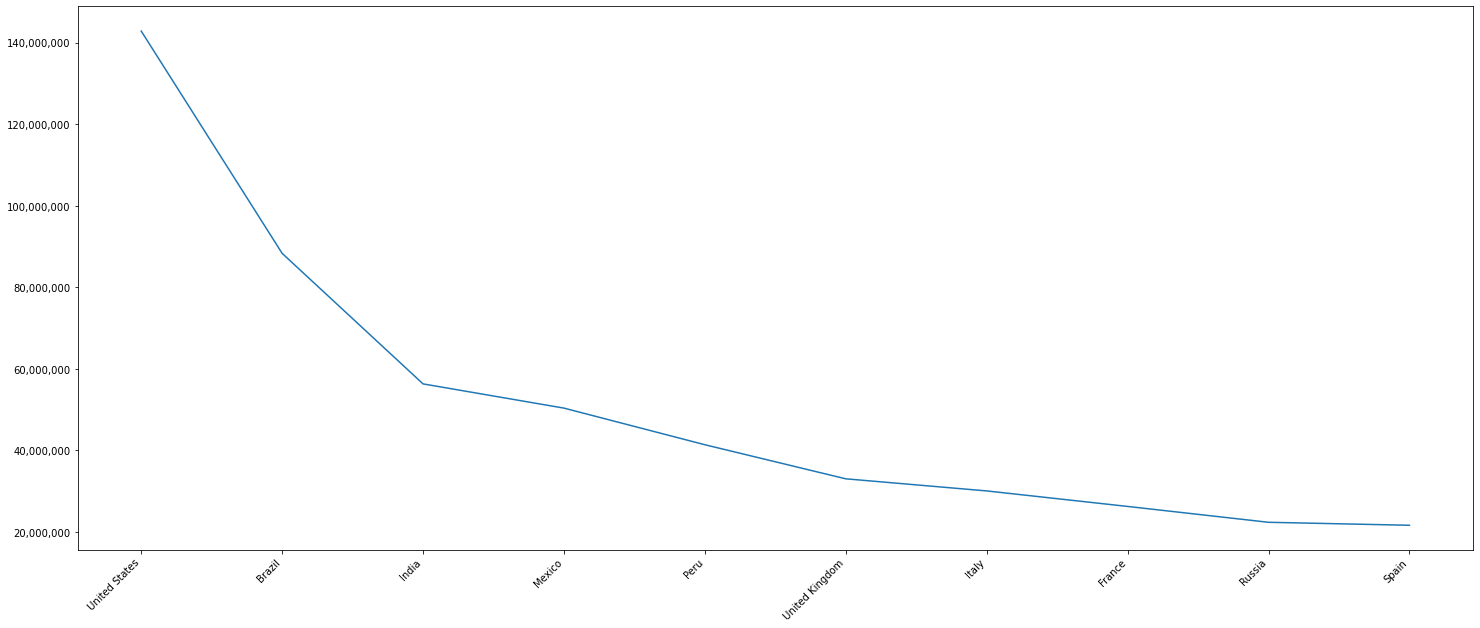

In [161]:
plt.figure(figsize=(25,10))
plt.plot(df1_topten['location'], df1_topten['total_deaths'])
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis="x", which='major', labelsize=10)
# after plotting the data, format the y labels
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

plt.show()

In [101]:
confirmed = df1.groupby('date')['total_cases'].sum().reset_index()
deaths = df1.groupby('date')['total_deaths'].sum().reset_index()

In [103]:
confirmed

,date,total_cases
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
542,2021-06-26,575027984.0
543,2021-06-27,575963841.0
544,2021-06-28,576975422.0
545,2021-06-29,578148223.0


In [104]:
deaths

,date,total_deaths
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
542,2021-06-26,12489499.0
543,2021-06-27,12507487.0
544,2021-06-28,12527672.0
545,2021-06-29,12552710.0


In [107]:
fig = go.Figure()

fig.add_trace(go.Bar(x=confirmed['date'],
                y=confirmed['total_cases'],
                name='Cases',
                marker_color='blue'
                ))

fig.add_trace(go.Bar(x=deaths['date'],
                y=deaths['total_deaths'],
                name='Deaths',
                marker_color='Red'
                ))

fig.update_layout(
    title='Global Coronavirus Cases: Confirmed Cases vs Total Deaths (Jan 2020 - Jun 2021)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases/Deaths',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()